In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("bestsellers with categories.csv")
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

display(df.head())
print("Розмір датасету (всі записи):", df.shape)

unique_books = df['name'].nunique()
print("Кількість унікальних книг:", unique_books)



,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Розмір датасету (всі записи): (550, 7)
Кількість унікальних книг: 351


Про скільки книг зберігає дані датасет? Відповідь: 351

Первинне дослідження даних

Кількість пропусків: 
 name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Унікальні значення:  ['Non Fiction' 'Fiction']


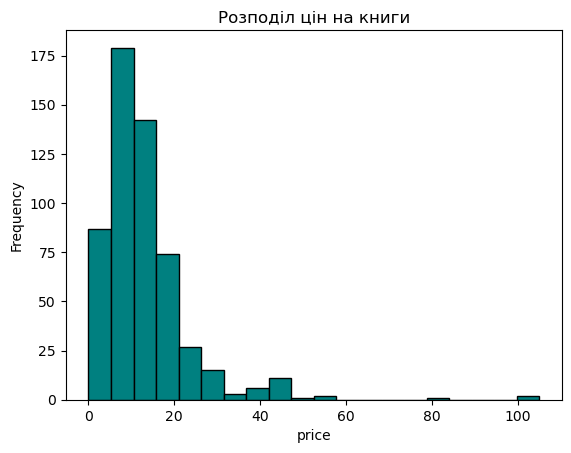

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [6]:
print("Кількість пропусків: \n", df.isna().sum())

print("\nУнікальні значення: ", df['genre'].unique())

df['price'].plot(kind='hist', bins=20, title='Розподіл цін на книги', color='teal', edgecolor='black')
plt.xlabel('price')
plt.show()

print(f"Максимальна ціна: {df['price'].max()}")
print(f"Мінімальна ціна: {df['price'].min()}")
print(f"Середня ціна: {df['price'].mean()}")
print(f"Медіанна ціна: {df['price'].median()}")

Чи є в якихось змінних пропуски? Відповідь: Ні
Які є унікальні жанри? Відповідь: 'Non Fiction' та 'Fiction'
Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0

Пошук та сортування даних

In [7]:
max_rating = df['user_rating'].max()
print("Найвищий рейтинг:", max_rating)

count_max_rating = df[df['user_rating'] == max_rating].shape[0]
print("Кількість книг з таким рейтингом:", count_max_rating)

most_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].iloc[0]
print("Книга з найбільшою кількістю відгуків:", most_reviews_book)

top_2015 = df[df['year'] == 2015]
most_expensive_2015 = top_2015[top_2015['price'] == top_2015['price'].max()]['name'].iloc[0]
print("Найдорожча книга у 2015 році:", most_expensive_2015)

fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print("Кількість книг Fiction у 2010 році:", fiction_2010)

rating_49_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print("Книги з рейтингом 4.9 у 2010 та 2011:", rating_49_2010_2011)

cheap_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book_sorted = cheap_2015['name'].iloc[-1]
print("Остання книга у відсортованому списку:", last_book_sorted)

Найвищий рейтинг: 4.9
Кількість книг з таким рейтингом: 52
Книга з найбільшою кількістю відгуків: Where the Crawdads Sing
Найдорожча книга у 2015 році: Publication Manual of the American Psychological Association, 6th Edition
Кількість книг Fiction у 2010 році: 20
Книги з рейтингом 4.9 у 2010 та 2011: 1
Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


Який рейтинг у датасеті найвищий? Відповідь: 4.9
Скільки книг мають такий рейтинг? Відповідь: 52
Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: Publication Manual of the American Psychological Association, 6th Edition
Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1
Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

Агрегування даних та з'єднання таблиць

In [8]:
genre_prices = df.groupby('genre')['price'].agg(['min', 'max'])
print("Ціни за жанрами:\n", genre_prices, "\n")

author_books = df.groupby('author')['name'].agg('count')
print("Розмірність таблиці author_books:", author_books.shape)
max_books_author = author_books.idxmax()
max_books_count = author_books.max()
print(f"Автор з найбільшою кількістю книг: {max_books_author} {max_books_count}")

author_rating = df.groupby('author')['user_rating'].agg('mean')
min_rating_author = author_rating.idxmin()
min_rating_value = author_rating.min()
print(f"Автор з мінімальним рейтингом: {min_rating_author} (рейтинг {min_rating_value})\n")

author_stats = pd.concat([author_books, author_rating],axis=1)
author_stats.columns = ['book_count', 'avg_rating']
sorted_author_stats = author_stats.sort_values(by=['book_count', 'avg_rating'])
print("Перший автор у відсортованому списку:\n", sorted_author_stats.head(1))

Ціни за жанрами:
              min  max
genre                
Fiction        0   82
Non Fiction    0  105 

Розмірність таблиці author_books: (248,)
Автор з найбільшою кількістю книг: Jeff Kinney 12
Автор з мінімальним рейтингом: Donna Tartt (рейтинг 3.9)

Перший автор у відсортованому списку:
                 book_count  avg_rating
author                                
Muriel Barbery           1         4.0


Максимальна ціна для жанру Fiction: Відповідь: 82
Мінімальна ціна для жанру Fiction: Відповідь: 0
Максимальна ціна для жанру Non Fiction: Відповідь: 105
Мінімальна ціна для жанру Non Fiction: Відповідь: 0
Якої розмірності вийшла таблиця? Відповідь: 248
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12
У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Який у цього автора середній рейтинг? Відповідь: 3.9
Який автор перший у списку? Відповідь: Muriel Barbery

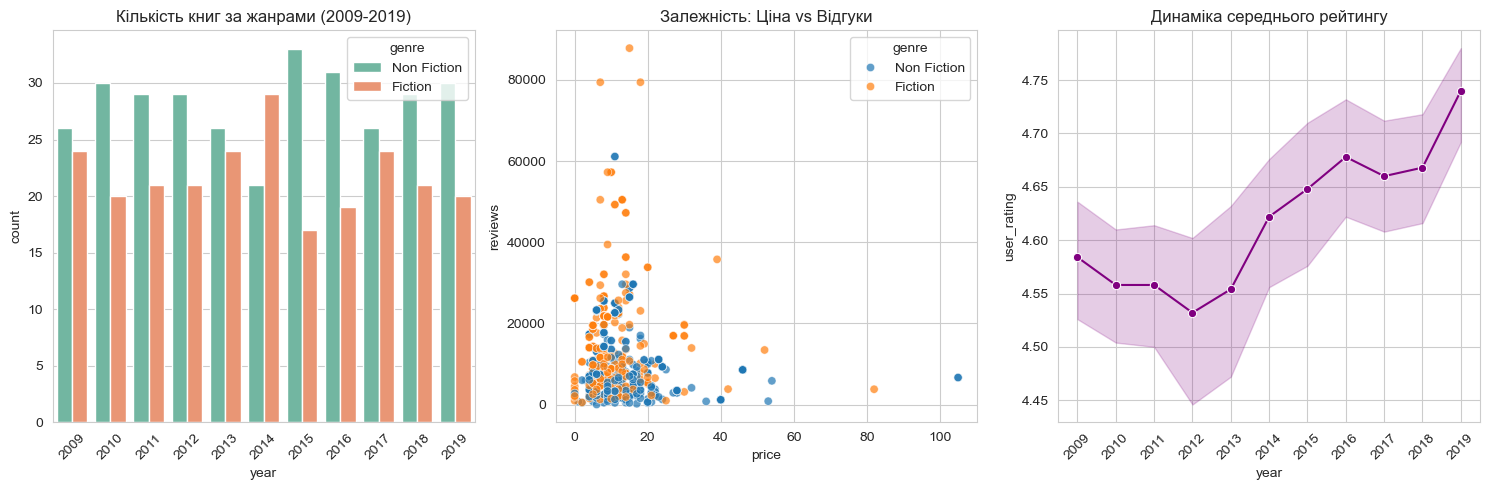

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='year', hue='genre', palette='Set2')
plt.title('Кількість книг за жанрами (2009-2019)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='price', y='reviews', hue='genre', alpha=0.7)
plt.title('Залежність: Ціна vs Відгуки')

plt.subplot(1, 3, 3)
sns.lineplot(data=df, x='year', y='user_rating', marker='o', color='purple')
plt.title('Динаміка середнього рейтингу')
plt.xticks(range(2009, 2020), rotation=45)

plt.tight_layout()
plt.show()